In [1]:

import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
path_df = "C:/Users/HP/Desktop/stajprojesi/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "C:/Users/HP/Desktop/stajprojesi/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "C:/Users/HP/Desktop/stajprojesi/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "C:/Users/HP/Desktop/stajprojesi/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "C:/Users/HP/Desktop/stajprojesi/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)


In [3]:

print(features_train.shape)
print(features_test.shape)

(1780, 300)
(445, 300)


Cross-Validation for Hyperparameter tuning¶
In the case of the Multinomial Naïve Bayes, we will not tune any hyperparameter.

In [4]:

mnbc = MultinomialNB()

In [5]:
mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
mnbc_pred = mnbc.predict(features_test)

In [7]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.9207865168539325


In [8]:

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.8921348314606742


In [9]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       118
           1       0.95      0.81      0.88        75
           2       0.90      0.87      0.89        85
           3       0.96      0.96      0.96        91
           4       0.84      0.84      0.84        76

   micro avg       0.89      0.89      0.89       445
   macro avg       0.90      0.88      0.89       445
weighted avg       0.90      0.89      0.89       445



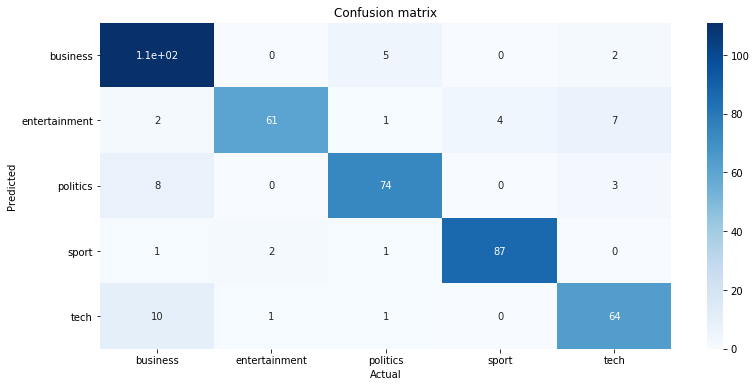

In [10]:
aux_df = df[['category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [12]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.920787,0.892135


In [15]:
with open('C:/Users/HP/Desktop/stajprojesi/Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('C:/Users/HP/Desktop/stajprojesi/Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)